In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [3]:
training_features, labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
labels = np.asarray([int(numeric_string) for numeric_string in labels])

# Change the conditions below to compare between other two digits.
class1Indices = (labels==0)
class2Indices = (labels==1)

x1 = training_features[class1Indices]
x2 = training_features[class2Indices]

training_features = np.concatenate((x1,x2),axis=0)
training_labels = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0)

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([training_features, training_labels], handle)



c:\Users\Adnane Ezouhri\Desktop\School\Machine_Learning\.venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets

In [4]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    training_features, training_labels = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
    
X_train, X_test, y_train, y_test = train_test_split(training_features, training_labels, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2


Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]


# Accuracy of a classifier

In [17]:
def testLinearClassifier(weights, features, labels):
    # Add a bias term to the feature vectors
    biased_features = np.hstack((features, np.ones((features.shape[0], 1))))
    
    # Compute the predictions
    sum_weighted = np.dot(weights.T, biased_features.T)
    predicted_labels = (sum_weighted > 0).astype(int)
    
    # Count the misclassifications
    misclassifications = np.sum(predicted_labels != labels)
    
    return misclassifications



## Define and test gaussianClassifierWithIdentityCovariance 

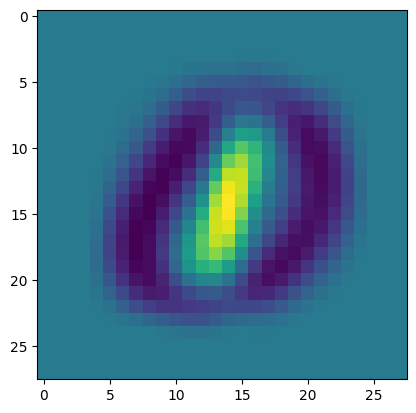

In [18]:
#------TRAINING CODE --------------

def gaussianClassifierWithIdentityCovariance(training_features, training_labels):
    
    biased_features = np.hstack((training_features, np.ones((training_features.shape[0], 1))))
    
    # Split the dataset into two classes
    features_C1 = biased_features[training_labels == 1]
    features_C2 = biased_features[training_labels == 0]

    # Compute the means
    mu1 = np.mean(features_C1, axis=0)
    mu2 = np.mean(features_C2, axis=0)

    # Compute the weights
    weights = mu1-mu2  

    return weights
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
weights = gaussianClassifierWithIdentityCovariance(X_train,y_train)
plt.imshow(np.reshape(weights[0:784],(28,28)))

train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)



## Define and test gaussianClassifierWithCommonCovariance 

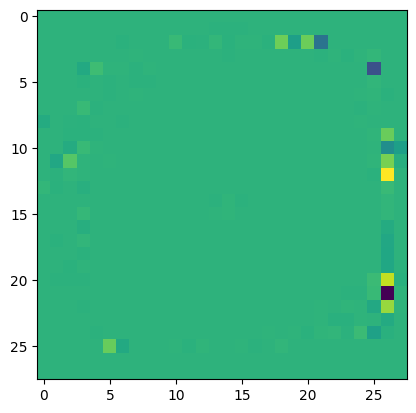

In [19]:
#------TRAINING CODE --------------

def gaussianClassifierWithCommonCovariance(training_features, training_labels):
    # Split the dataset into two classes

    biased_features = np.hstack((training_features, np.ones((training_features.shape[0], 1))))

    features_C1 = biased_features[training_labels == 1]
    features_C2 = biased_features[training_labels == 0]

    # Compute the means
    mu1 = np.mean(features_C1, axis=0)
    mu2 = np.mean(features_C2, axis=0)

    # Compute the common covariance matrix
    common_covariance = np.cov(biased_features.T)


    weights = np.dot(np.linalg.pinv(common_covariance), (mu1 - mu2))


    return weights

    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
weights = gaussianClassifierWithCommonCovariance(X_train,y_train)
plt.imshow(np.reshape(weights[0:784],(28,28)))

train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)


## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 

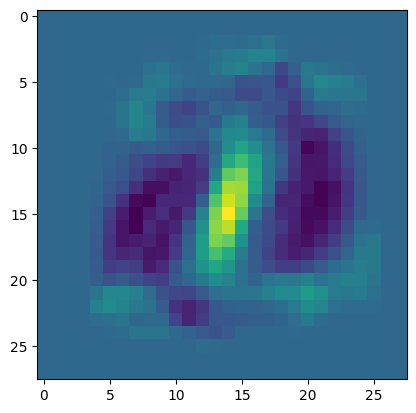

In [23]:
def logisticRegression(
    training_features, training_labels, iterations=100, step_size=1e-4, verbose=False
):
    # Add a bias term to the feature vectors
    biased_training_features = np.hstack(
        (training_features, np.ones((training_features.shape[0], 1)))
    )
    # Initialize the weights
    weights = 0.01 * np.random.randn(biased_training_features.shape[1])



    for i in range(iterations):
        # Calculate the model predictions
        lin_comb = np.dot(biased_training_features, weights)

        predictions = expit(lin_comb)

        error = predictions - training_labels

        gradient = np.dot(biased_training_features.T, error)

        # Update the weights
        weights -= step_size * gradient

    return weights
    # YOUR CODE HERE


# ------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
weights = logisticRegression(X_train, y_train, iterations=500)
plt.imshow(np.reshape(weights[0:784], (28, 28)))

train = testLinearClassifier(weights, X_train, y_train)
val = testLinearClassifier(weights, X_val, y_val)
test = testLinearClassifier(weights, X_test, y_test)

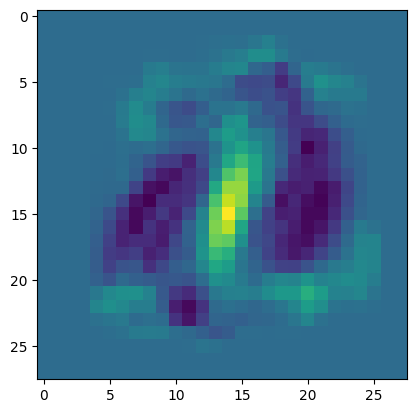

In [24]:
def logisticRegressionWithRegularization(training_features, training_labels, iterations=100, step_size=1e-4, lam=1, verbose= False):
# Add a bias term to the feature vectors
    biased_training_features = np.hstack(
        (training_features, np.ones((training_features.shape[0], 1)))
    )
    # Initialize the weights
    weights = 0.01 * np.random.randn(biased_training_features.shape[1])



    for i in range(iterations):
        # Calculate the model predictions
        lin_comb = np.dot(biased_training_features, weights)

        predictions = expit(lin_comb)

        error = predictions - training_labels

        gradient = np.dot(biased_training_features.T, error) + 2* lam* weights

        # Update the weights
        weights -= step_size * gradient

    return weights

    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(weights[0:784],(28,28)))

train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)


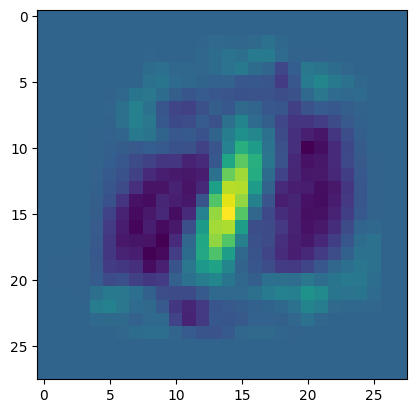

In [29]:
def optimizeHyperparameters(training_features, training_labels):
    missclassifications_given_lam = []

    lam= np.linspace(0, 100, num=100)

    for l in lam:
        weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=l)
        missclassifications_given_lam.append(testLinearClassifier(weights,training_features,training_labels))
    
    top_lam = lam[np.argmin(missclassifications_given_lam)]

    return top_lam

optimal_lam = optimizeHyperparameters(X_val,y_val)
optimal_weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,lam=optimal_lam)
plt.imshow(np.reshape(optimal_weights[:-1],(28,28)))

train = testLinearClassifier(optimal_weights,X_train,y_train)
val = testLinearClassifier(optimal_weights,X_val,y_val)
test = testLinearClassifier(optimal_weights,X_test,y_test)




# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW

In [28]:
# Gaussian Classifier with Identity Covariance
print("Gaussian Classifier with Identity Covariance Results:")
weights = gaussianClassifierWithIdentityCovariance(X_train,y_train)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)
print(f"Training missclassification : {train} out of {X_train.shape[0]}, representing {train/X_train.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.shape[0]}, representing {val/X_val.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.shape[0]}, representing {test/X_test.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Gaussian Classifier with Common Covariance
print("Gaussian Classifier with Common Covariance Results:")
weights = gaussianClassifierWithCommonCovariance(X_train,y_train)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)
print(f"Training missclassification : {train} out of {X_train.shape[0]}, representing {train/X_train.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.shape[0]}, representing {val/X_val.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.shape[0]}, representing {test/X_test.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Logistic Regression
print("Logistic Regression Results:")
weights = logisticRegression(X_train,y_train, iterations=500, step_size=1e-4)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)
print(f"Training missclassification : {train} out of {X_train.shape[0]}, representing {train/X_train.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.shape[0]}, representing {val/X_val.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.shape[0]}, representing {test/X_test.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Logitic Regression with Regularization
print("Logitic Regression with Regularization Results:")
weights = logisticRegressionWithRegularization(X_train,y_train, iterations=500, step_size=1e-4, lam=1)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.shape[0]}, representing {train/X_train.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.shape[0]}, representing {val/X_val.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.shape[0]}, representing {test/X_test.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Logitic Regression with Regularization and Hyperparameter Optimization
print("Logistic Regression with Regularization and Hyperparameter Optimization Results:")
optimal_lam = optimizeHyperparameters(X_val,y_val)
weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,lam=optimal_lam)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.shape[0]}, representing {train/X_train.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.shape[0]}, representing {val/X_val.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.shape[0]}, representing {test/X_test.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")


Gaussian Classifier with Identity Covariance Results:
Training missclassification : 184 out of 8897, representing 2.07%
Training missclassification : 26 out of 8897, representing 1.79%
Training missclassification : 99 out of 8897, representing 2.23%
---------------------------------------------------------------------------------------------------------------
Gaussian Classifier with Common Covariance Results:
Training missclassification : 55 out of 8897, representing 0.62%
Training missclassification : 15 out of 8897, representing 1.04%
Training missclassification : 31 out of 8897, representing 0.70%
---------------------------------------------------------------------------------------------------------------
Logistic Regression Results:
Training missclassification : 12 out of 8897, representing 0.13%
Training missclassification : 0 out of 8897, representing 0.00%
Training missclassification : 4 out of 8897, representing 0.09%
---------------------------------------------------------